<a href="https://colab.research.google.com/github/ISHAAN-KKR/google-collab/blob/main/sbin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
df = pd.read_csv('SBI.csv')

In [ ]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-Jun-2024,EQ,846.80,860.60,841.00,844.90,854.30,852.6,850.68,912.0,543.2,"3,29,25,140","28,00,86,46,934.95","3,94,742"
1,18-Jun-2024,EQ,841.55,851.50,840.25,839.20,845.30,844.9,847.17,912.0,543.2,"1,49,29,083","12,64,75,06,030.85","2,41,973"
2,14-Jun-2024,EQ,845.00,849.90,835.10,843.90,839.20,839.2,841.90,912.0,543.2,"1,29,03,496","10,86,34,38,124.70","2,06,549"
3,13-Jun-2024,EQ,845.00,845.90,836.10,839.10,844.95,843.9,842.29,912.0,543.2,"1,25,23,972","10,54,88,43,617.45","1,85,661"
4,12-Jun-2024,EQ,837.00,845.55,833.00,835.55,838.85,839.1,840.25,912.0,543.2,"1,50,71,442","12,66,38,19,955.65","2,47,749"


In [ ]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [ ]:

df['Date '] = pd.to_datetime(df['Date '])

df.sort_values('Date ', inplace=True)

df.set_index('Date ', inplace=True)

data = df['close '].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
train_data_len = int(len(scaled_data) * 0.8)

train_data = scaled_data[:train_data_len]
test_data = scaled_data[train_data_len:]

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(max(0, len(data) - time_step - 1)):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 20

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
6/6 [==============================] - 9s 282ms/step - loss: 0.0444 - val_loss: 0.0041
Epoch 2/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0170 - val_loss: 0.0458
Epoch 3/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0100 - val_loss: 0.0041
Epoch 4/50
6/6 [==============================] - 0s 35ms/step - loss: 0.0105 - val_loss: 0.0037
Epoch 5/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 6/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0082 - val_loss: 0.0038
Epoch 7/50
6/6 [==============================] - 0s 36ms/step - loss: 0.0073 - val_loss: 0.0035
Epoch 8/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0080 - val_loss: 0.0039
Epoch 9/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 10/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0066 - val_loss: 0.0042
Epoch 11/50
6/6 [===========

1/1 [==============================] - 0s 42ms/step
Train RMSE: 96.06192960798501
Test RMSE: 22.027405607858668


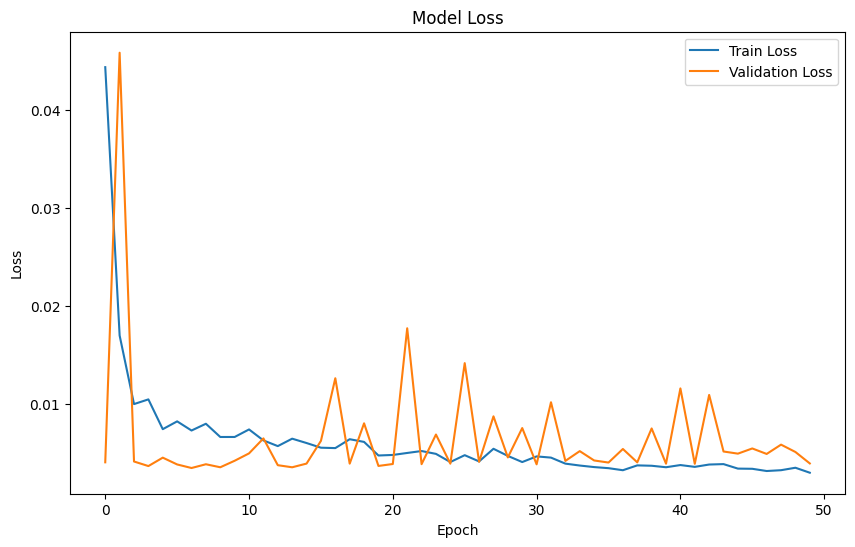

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

train_rmse = np.sqrt(np.mean((train_predict - scaler.inverse_transform([y_train]))**2))
test_rmse = np.sqrt(np.mean((test_predict - scaler.inverse_transform([y_test]))**2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
len(valid)

29

<ipython-input-108-0b350b130255>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict


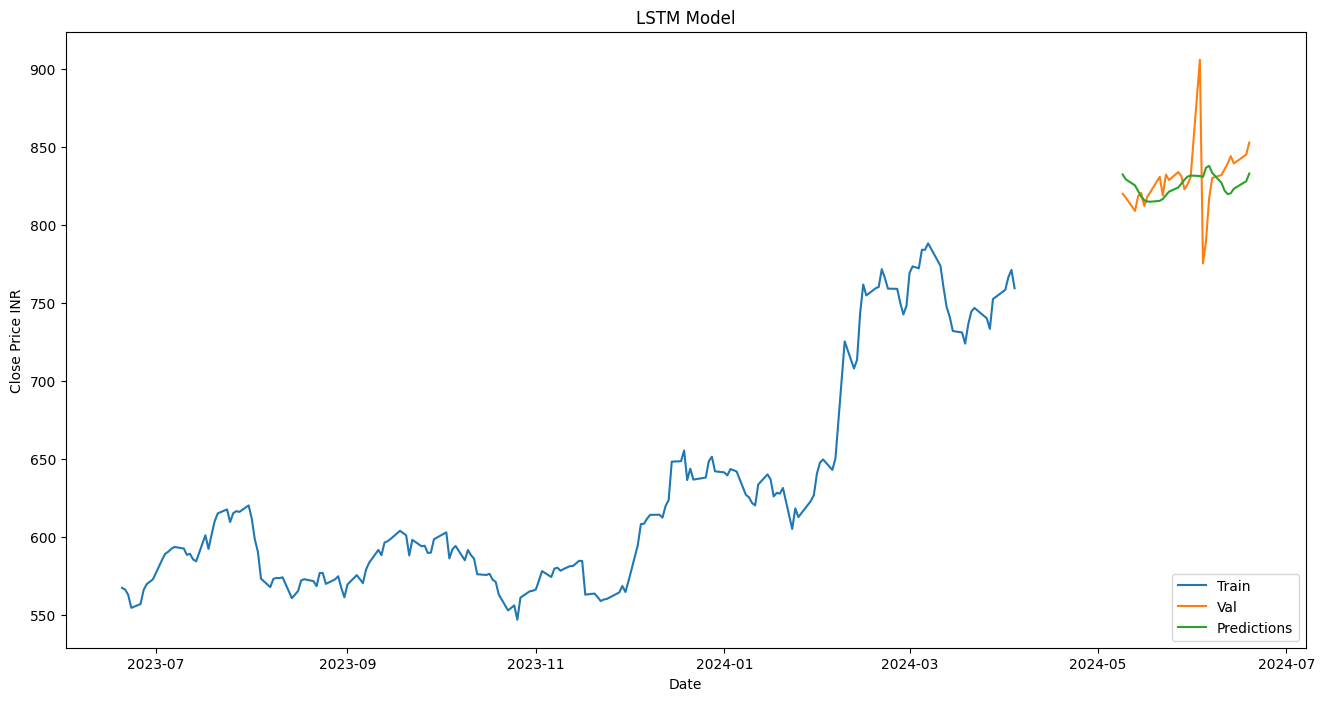

In [ ]:
train = df[:train_data_len]
valid = df[train_data_len + time_step+1 :]
valid['Predictions'] = test_predict

plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price INR')
plt.plot(train['close '])
plt.plot(valid[['close ', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


1/1 [==============================] - 0s 35ms/step


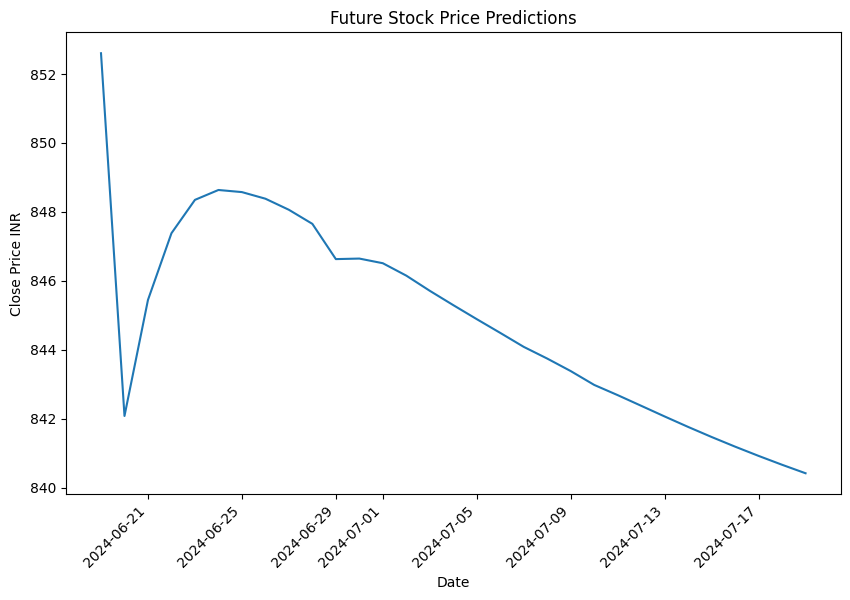

In [ ]:
last_100_days = scaled_data[-time_step:]
X_future = [last_100_days]
X_future = np.array(X_future).reshape(1, -1, 1)

future_predictions = []
for _ in range(30):
    future_pred = model.predict(X_future)
    future_predictions.append(future_pred[0, 0])
    X_future = np.append(X_future[:, 1:, :], [future_pred], axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start=df.index[-1], periods=31), np.append(data[-1], future_predictions))
plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Close Price INR')
plt.show()
